In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import time
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_netf=pd.read_csv("netflixdata.csv")


Data Cleaning

In [ ]:
#identify colums with missing values
print(df_netf.info())
print(df_netf.isnull().sum())

In [3]:
#handle missing values // in this case i'm dropping date_added, rating and duration rows because it is an insignificant amount of data
df_netf.dropna(subset=['date_added','rating','duration'],inplace=True)
df_netf['director'].fillna('Director Missing',inplace=True)
df_netf['cast'].fillna('Cast Missing',inplace=True)
df_netf['country'].fillna('Country Missing',inplace=True)

In [4]:
df_netf['country'] = df_netf['country'].apply(lambda x: "".join(x.rstrip().lstrip()))

In [5]:
#change date format
df_netf['date_added'] = df_netf['date_added'].apply(lambda x: x.replace(" ",""))
df_netf['date_added'] = df_netf['date_added'].apply(lambda x: datetime.strptime(x, "%B%d,%Y").strftime("%m-%d-%Y"))
df_netf['date_added'] = pd.to_datetime(df_netf['date_added'], errors='coerce')
df_netf['month_added']=df_netf['date_added'].dt.month
df_netf['year_added']=df_netf['date_added'].dt.year


In [6]:
df_netf.drop(axis=1, columns=['date_added'],inplace=True)

Findings

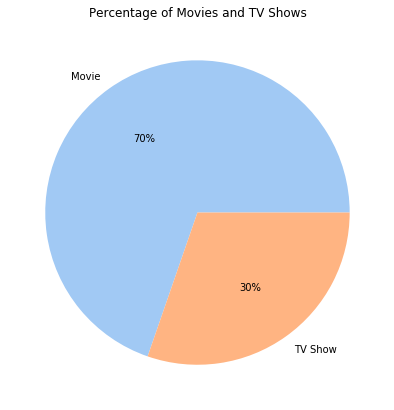

In [48]:
#Percentage of movies and tv shows on netflix by counting values
colors=sns.color_palette('pastel')[0:2]
plt.figure(figsize=(8,7))
plt.title("Percentage of Movies and TV Shows")
plt.pie(df_netf['type'].value_counts(),labels=df_netf['type'].value_counts().index, colors=colors,autopct='%.0f%%')
plt.show()

According to the pie chart, Netflix content are mostly movies (70%)

In [49]:
#splitting the column elements in order to get all the director names
direct=df_netf['director'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True)

DIRECTORS 

# The directors whose movies have been released the most on the platform without taking into account the type of content are:

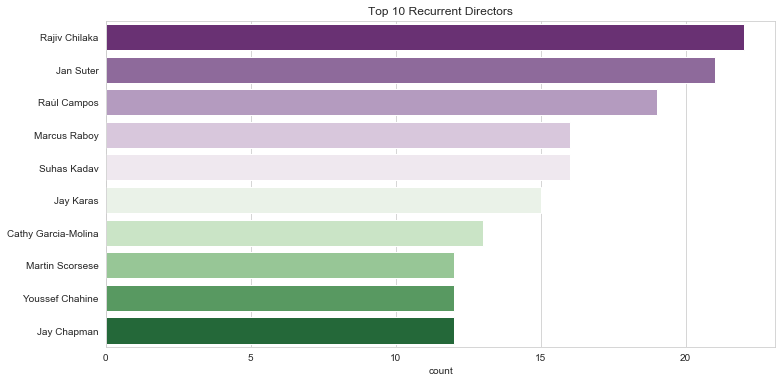

In [63]:
#Directors whose movies have been released the most on netflix
plt.figure(figsize=(12,6))
plt.title("Top 10 Recurrent Directors")
sns.countplot(y=direct,order=direct.value_counts().index[1:11], palette='PRGn')
plt.show()

# The TOP 5 Directors in Movies based on the amount of content are:

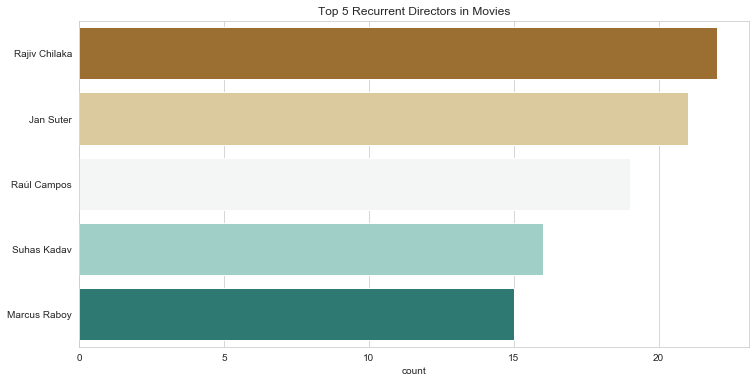

In [64]:
#most frequent/popular directors in movies 
direct_movies=df_netf[df_netf['type']=='Movie']['director'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
plt.title("Top 5 Recurrent Directors in Movies")
sns.countplot(y=direct_movies,order=direct_movies.value_counts().index[1:6], palette='BrBG')
plt.show()

# The TOP 5 Directors in TV Shows based on the amount of content are:

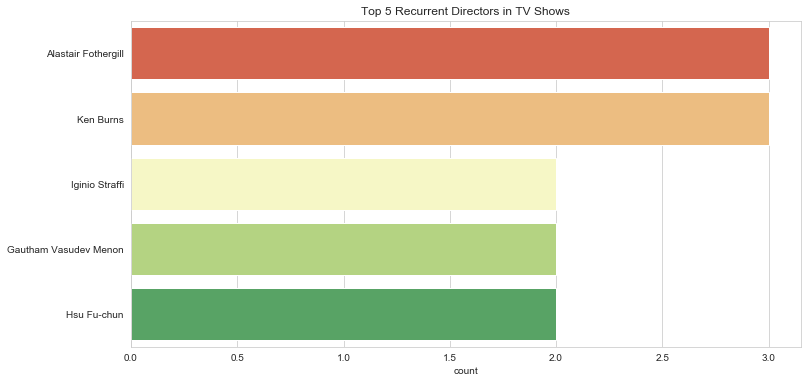

In [66]:
#most frequent/popular directors in TV Shows 
direct_tv=df_netf[df_netf['type']=='TV Show']['director'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
plt.title("Top 5 Recurrent Directors in TV Shows")
sns.countplot(y=direct_tv,order=direct_tv.value_counts().index[1:6], palette='RdYlGn')
plt.show()

# Actors that appear the most on netflix:

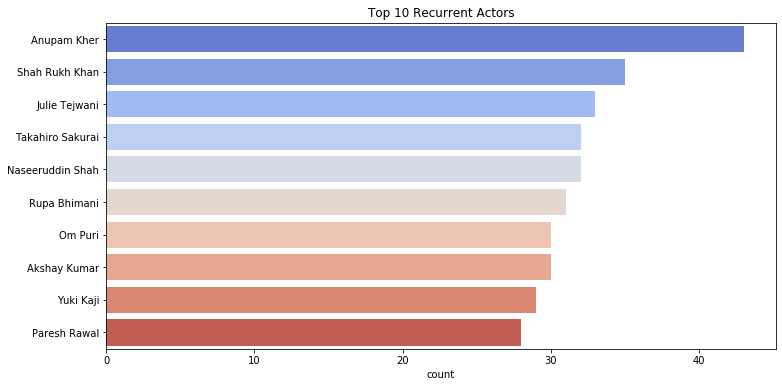

In [53]:
#dividing the cast members by splitting 
#Most frequent/popular actors in netflix content
actors=df_netf['cast'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
plt.title("Top 10 Recurrent Actors")
sns.countplot(y=actors,order=actors.value_counts().index[1:11], palette='coolwarm')
plt.show()

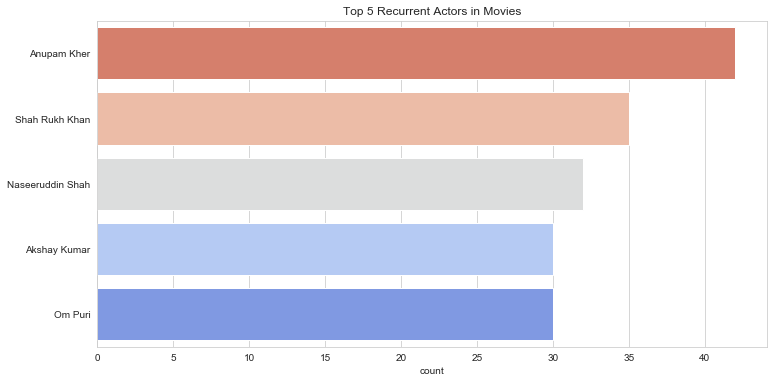

In [68]:
#Most frequent actors in movies
actors_movie=df_netf[df_netf['type']=='Movie']['cast'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
plt.title("Top 5 Recurrent Actors in Movies")
sns.countplot(y=actors_movie,order=actors_movie.value_counts().index[1:6], palette='coolwarm_r')
plt.show()

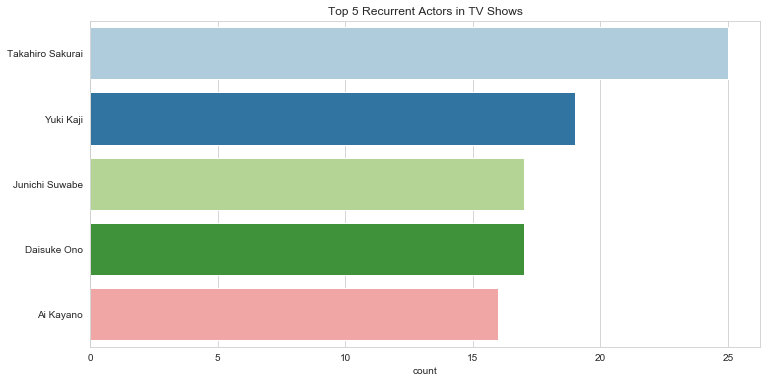

In [73]:
#Most frequent actors in TV Shows
actors_tv=df_netf[df_netf['type']=='TV Show']['cast'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,6))
plt.title("Top 5 Recurrent Actors in TV Shows")
sns.countplot(y=actors_tv,order=actors_tv.value_counts().index[1:6], palette='Paired')
plt.show()

In [56]:
#Country code 
import pycountry
input_countries = df_netf['country'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True).unique().tolist()
Dict={}
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3 

for country in input_countries:
    codes = countries.get(country, 'Missing') #missing value in case no code is found
    Dict[country]=codes 


In [57]:
#Dataframe to organize the countries, its frequency and code 
df=df_netf['country'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True) 
df=df.value_counts().rename_axis('country').reset_index(name='counts')
df.index=df['country']
country_codes=pd.Series(Dict,index=Dict.keys(),name='codes')#dictionary into pandas serie
dff=pd.merge(country_codes,df, right_index = True,
               left_index = True)
dff=dff.drop('Country Missing') #dropping the missing country values

# Countries with the highest amount of content on netflix

In [58]:
#WORLD MAP GRAPH USING PLOTLY
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
init_notebook_mode(connected=True) 

data = dict(
        type = 'choropleth',
        locations = dff['codes'],
        z = dff['counts'],
        text = dff['country'],
        colorbar = {'title' : 'Movies and TV Shows'},) 

layout = dict(
    title = 'Netflix Content per country',
    geo = dict(
        showframe = False,
        projection = {'type':'robinson'}))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

United States, India, United Kingdom, Canada, France and Japan are the countries with the majority of the content on netflix

# Most added genres on netflix

In [59]:
#genre
#most popular genres on netflix based on the amount of content in each one -- some content belongs to more than one genre
import plotly.express as px
genre=df_netf['listed_in'].str.split(", ",expand=True).stack().reset_index(level=1, drop=True)
genre=genre.value_counts().rename_axis('genre').reset_index(name='freq') #changing the name so it is easier to identify
fig = px.treemap(genre, path=[px.Constant("Genres"),"genre","freq"],values=genre['freq']) #adding the value so the graph is in order
fig.update_traces(root_color="lightgrey")
fig.update_layout(title='Most Popular Genres', margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# How movies average duration have change over the years

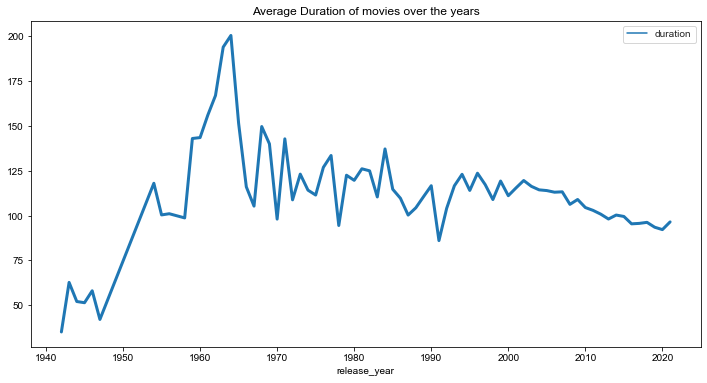

In [60]:
#Duration of movies over the years
movie_dur=df_netf[df_netf['type']=='Movie'][['duration','release_year']]
movie_dur['duration']=movie_dur['duration'].str.replace(" min","") #deleting the string 'min' 
movie_dur['duration'] = pd.to_numeric(movie_dur['duration'])
movie_dur_sub=movie_dur.groupby(['release_year']).mean()
plt.figure(figsize=(12,6))
plt.title("Average Duration of movies over the years")
sns.set_style("whitegrid")
sns.lineplot(data=movie_dur_sub, linewidth=3)

According to the graph, movies duration have been decreasing since the 60s and they are now around 100 minutes on average. 

# Number of Seasons in TV Shows

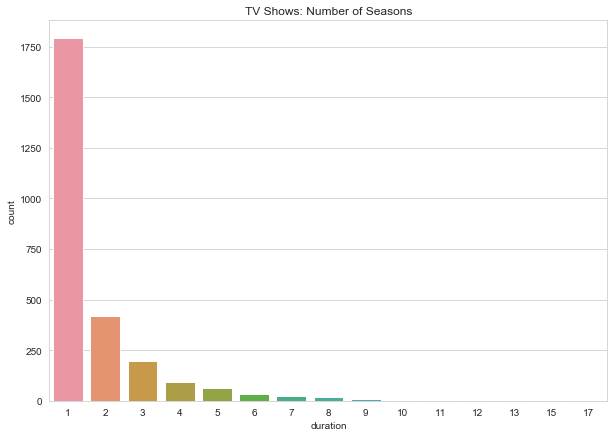

In [61]:
#Number of seasons in TV Shows
tv_dur=df_netf[df_netf['type']=='TV Show'][['duration']]
tv_dur['duration']=tv_dur['duration'].str.replace(" season","")
tv_dur['duration']=tv_dur['duration'].str.replace(" Seasons","")
tv_dur['duration']=tv_dur['duration'].str.replace(" Season","")
tv_dur['duration'] = pd.to_numeric(tv_dur['duration'])
plt.figure(figsize=(10,7))
plt.title("TV Shows: Number of Seasons")
sns.countplot(x="duration", data=tv_dur)

Most of the TV Shows on netflix only have 1 season

# Amount of released content per month

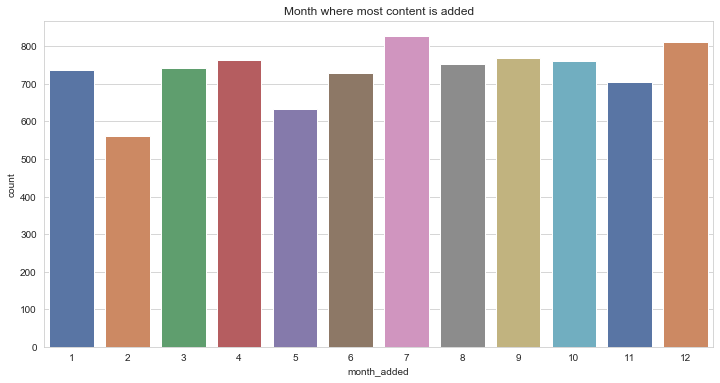

In [62]:
#Month where most content is released
plt.figure(figsize=(12,6))
plt.title("Month where most content is added")
sns.countplot(x="month_added",data=df_netf, palette='deep')
plt.show()

July and December are the months with the most content added overall

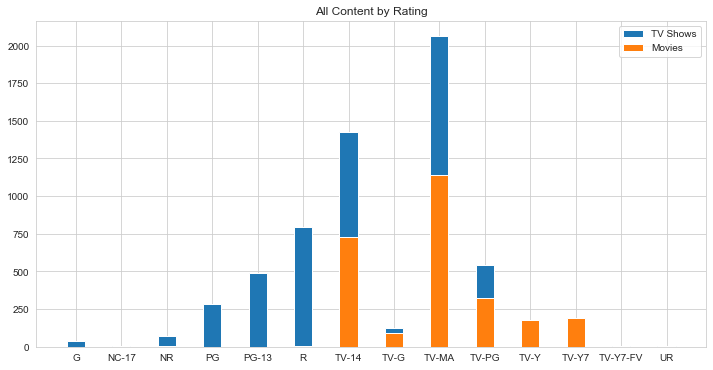

In [74]:
#Content by rating: TV SHOWS AND MOVIES
rating_movies=df_netf[df_netf['type']== 'Movie'].groupby('rating').count().reset_index()
rating_tv=df_netf[df_netf['type']== 'TV Show'].groupby('rating').count().reset_index()

plt.figure(figsize=(12,6))
plt.title('All Content by Rating')
plt.bar(rating_movies['rating'], rating_movies['title'], 0.4, label = 'Movies')
plt.bar(rating_tv['rating'], rating_tv['title'], 0.4, label = 'TV Shows')
plt.legend(['TV Shows', 'Movies'])
plt.show()

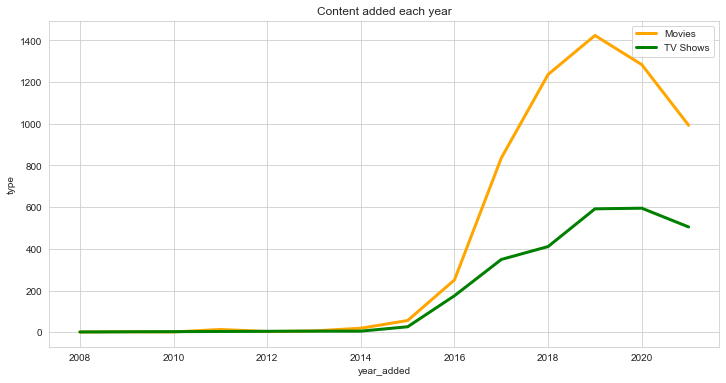

In [75]:
#Content of mvoies and tv shows added each year 
added_movies=df_netf[df_netf['type']=='Movie'].groupby('year_added').count().reset_index()
added_movies=added_movies[['year_added','type']]
added_tvs=df_netf[df_netf['type']=='TV Show'].groupby('year_added').count().reset_index()
added_tvs=added_tvs[['year_added','type']]
plt.figure(figsize=(12,6))
plt.title('Content added each year')
sns.set_style("whitegrid")
sns.lineplot(data=added_movies, x="year_added", y="type",color="orange",markers=True,linewidth=3,label="Movies")
sns.lineplot(data=added_tvs, x="year_added", y="type",color="green",markers=True,linewidth=3,label="TV Shows")
plt.legend()

In [97]:
#YEARS BETWEEN THE RELEASE DATE AND THE ADDED DATE

difference=pd.DataFrame()
difference['show']=df_netf['show_id']
difference['year_added']=df_netf['year_added']
difference['release_year']=df_netf['release_year']
difference=difference[difference['year_added']>=difference['release_year']]
difference['Dif']=df_netf['year_added']-df_netf['release_year']
print('mean ',difference['Dif'].mean())
print('max ',difference['Dif'].max())
print('min ',difference['Dif'].min())


mean  4.699863263445761
max  93
min  0
